In [2]:
# imports 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pytz import timezone
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from hurst import compute_Hc
register_matplotlib_converters()


In [25]:
def plot_col(data , col_name):
    plt.figure(figsize=(16, 6))
    plt.plot(data.index, data[col_name], label='col_name', color='purple', )
    # plt.plot(data.index, data['col_name'], label='col_name', color='purple', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(f'{col_name}')
    plt.legend()
    plt.show()

In [3]:
def download_data(symbols, start_date, end_date):

    try:
        data = yf.download(symbols, start=start_date, end=end_date, interval='1d')['Close']
    except: 
        SyntaxError("Exception in downloading data")
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    # data = data.reset_index()
    # timestamp_column_name = data.columns[0]  # Assuming the timestamp is the first column
    # data = data[[timestamp_column_name, 'Close']]
    # data.columns = ['timestamp', 'price']
    # print(symbol, start_date, end_date, interval, data.shape[0])
    return data

In [4]:
train_start = datetime(2022, 11, 1, tzinfo=timezone('Asia/Tehran'))
train_end = datetime(2023, 11, 1, tzinfo=timezone('Asia/Tehran'))
cryptos = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'SOL-USD',]

In [5]:
df = download_data(cryptos, train_start, train_end)

[*********************100%%**********************]  4 of 4 completed


In [12]:
df

,BTC-USD,ETH-USD,SOL-USD,USDT-USD,close
Datetime,,,,,
2022-10-31 20:00:00+00:00,20414.517578,1566.357544,32.628006,0.999991,6600.988136
2022-10-31 21:00:00+00:00,20419.890625,1561.830566,32.294346,0.999972,6601.175221
2022-10-31 22:00:00+00:00,20476.570312,1566.029175,32.611946,0.999954,6619.502226
2022-10-31 23:00:00+00:00,20497.367188,1572.827515,32.611481,0.999960,6627.780699
2022-11-01 00:00:00+00:00,20456.050781,1570.259644,32.655155,0.999902,6614.624139
...,...,...,...,...,...
2023-10-31 15:00:00+00:00,34290.898438,1794.058105,36.138054,1.000550,10832.914684
2023-10-31 16:00:00+00:00,34435.875000,1804.103638,36.321327,1.000362,10879.457929
2023-10-31 17:00:00+00:00,34388.402344,1801.712769,36.159809,1.000317,10864.466559


In [13]:
weights = [0.3, 0.3, 0.2, 0.2]
num_coins=[0,0,0,0]
money_at_first = 1000

In [11]:
df['close']  = df['BTC-USD'] * weights[0] + df['ETH-USD'] * weights[1] + df['SOL-USD'] * weights[2] + df['USDT-USD'] * weights[3]

In [42]:
num_coins[0] = (money_at_first*weights[0]) / (df["BTC-USD"][0])  
num_coins[1] = (money_at_first*weights[1]) / (df["ETH-USD"][0])  
num_coins[2] = (money_at_first*weights[2]) / (df["SOL-USD"][0])  
num_coins[3] = (money_at_first*weights[3]) / (df["USDT-USD"][0])  

C:\Users\user\AppData\Local\Temp\ipykernel_3508\1907227092.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_coins[0] = (money_at_first*weights[0]) / (df["BTC-USD"][0])
C:\Users\user\AppData\Local\Temp\ipykernel_3508\1907227092.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_coins[1] = (money_at_first*weights[1]) / (df["ETH-USD"][0])
C:\Users\user\AppData\Local\Temp\ipykernel_3508\1907227092.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

In [43]:
num_coins[0]

0.014695424413137365

In [44]:
(0.3 * 1000) /20414.517578

0.014695424413227347

In [37]:
df['darayi'] = num_coins[0]* df["BTC-USD"] +num_coins[1]* df["ETH-USD"] +num_coins[2]* df["SOL-USD"] +num_coins[3]* df["USDT-USD"]

In [38]:
df

,BTC-USD,ETH-USD,SOL-USD,USDT-USD,close,darayi
Datetime,,,,,,
2022-10-31 20:00:00+00:00,20414.517578,1566.357544,32.628006,0.999991,6600.988136,1000.000000
2022-10-31 21:00:00+00:00,20419.890625,1561.830566,32.294346,0.999972,6601.175221,997.162927
2022-10-31 22:00:00+00:00,20476.570312,1566.029175,32.611946,0.999954,6619.502226,1000.743178
2022-10-31 23:00:00+00:00,20497.367188,1572.827515,32.611481,0.999960,6627.780699,1002.349251
2022-11-01 00:00:00+00:00,20456.050781,1570.259644,32.655155,0.999902,6614.624139,1001.506277
...,...,...,...,...,...,...
2023-10-31 15:00:00+00:00,34290.898438,1794.058105,36.138054,1.000550,10832.914684,1269.157482
2023-10-31 16:00:00+00:00,34435.875000,1804.103638,36.321327,1.000362,10879.457929,1274.297827
2023-10-31 17:00:00+00:00,34388.402344,1801.712769,36.159809,1.000317,10864.466559,1272.143185


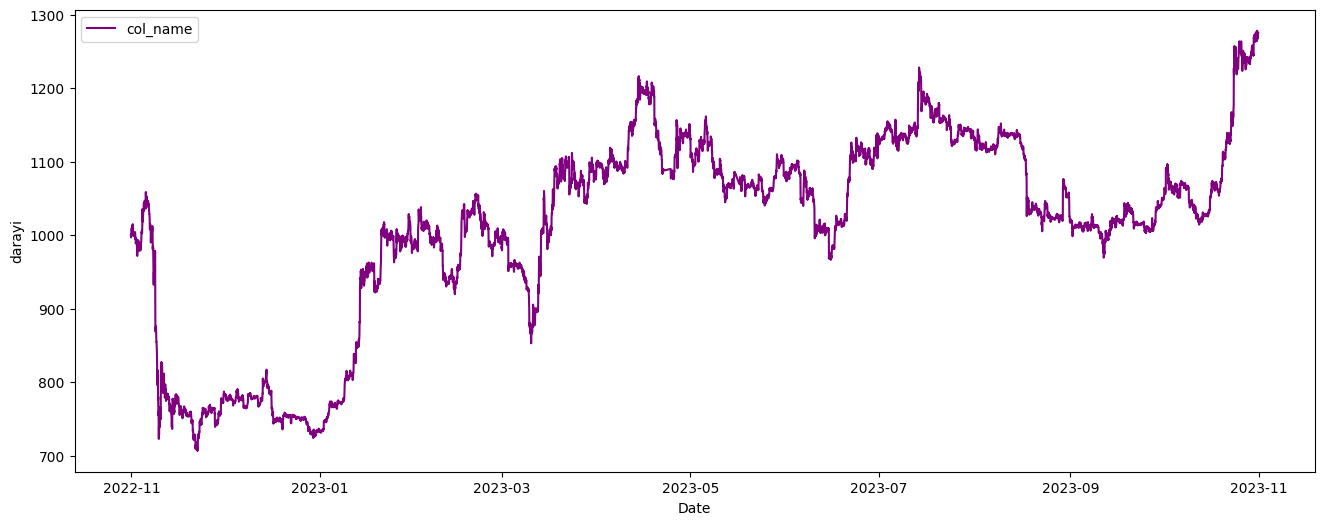

In [39]:
plot_col(df,"darayi")

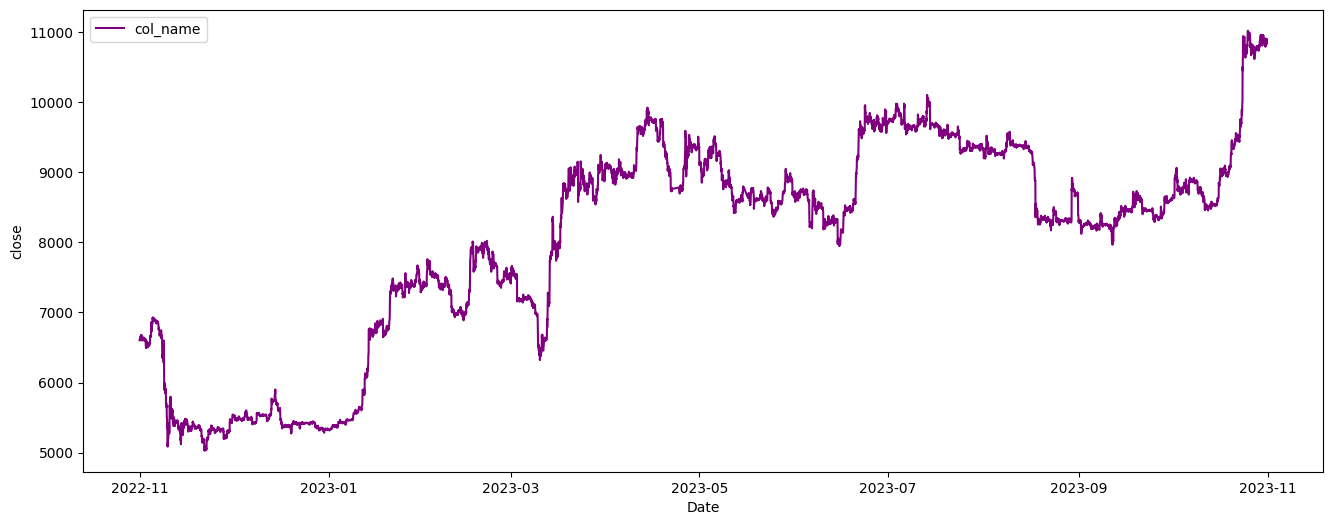

In [40]:
plot_col(df,"close")

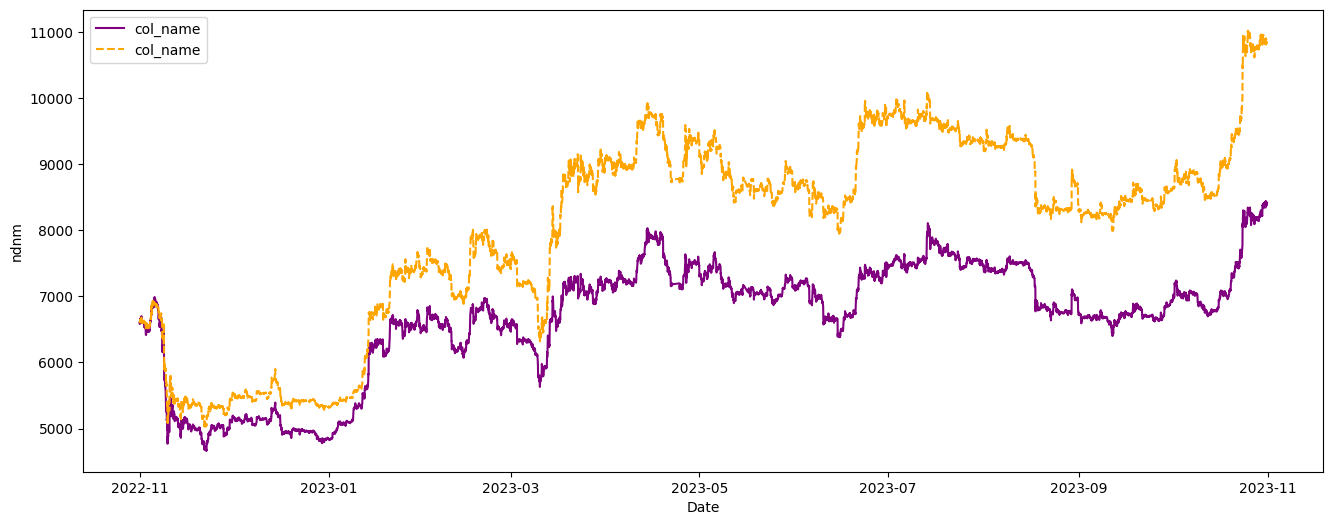

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['darayi']*6600.988136/1000, label='col_name', color='purple', )
plt.plot(df.index, df['close'], label='col_name', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('ndnm')
plt.legend()
plt.show()

In [1]:
ls = [0.801532064983423, 1.5496863052059476e-16, 0.11702639539074727, 0.08144153962582974]
sum(ls)

1.0

In [1]:
x = [1.7093995937558557e-17, 0.30547961017630026, 0.6945203898236999, 1.2846575107820391e-16]
sum(x)

1.0000000000000004

In [16]:
import numpy as np

result = np.random.dirichlet(np.ones(4), size=1)
print(result[0])

[0.03809035 0.67606808 0.04455744 0.24128413]


In [15]:

sum([0.56220192, 0.11524906 ,0.31645519 ,0.00609383])

1.0

In [ ]:
randomWeights = np.random.dirichlet(np.ones(4), size=1)


In [17]:
sum([0.6040801533096427, 1.3465790982269965e-16, 0.32563876309425394, 0.0702810835961031])


0.9999999999999999